In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [9]:
sal=pd.read_csv('position_salaries.csv',sep=',')
#salaries


In [7]:
qualite=pd.read_csv('qualite-vin-rouge.csv',sep=',')
#qualite

In [10]:
print(sal.shape) # (10, 3)
print(sal.head(5))

(10, 3)
            Position  Level  Salary
0   Project Analyste      1   45000
1          Ingenieur      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [11]:
y_simple = sal.iloc[:,-1:].values
x_simple = sal.iloc[:,1:2].values

X_simple = np.hstack((x_simple, np.ones(y_simple.shape)))
m = X_simple.shape[0]

print(X_simple.shape, y_simple.shape) # (10, 2) (10, 1) >> donc theta(2,1)

theta_simple = np.random.rand(2,1)


(10, 2) (10, 1)


In [12]:
# Création du modèle (model(X,theta)) 
def model(X, theta):
	return X.dot(theta)

# Fonction du coût (fonction_cout(X,y,theta))
def fonction_cout(X, y, theta):
	return 1/(2*m) * np.sum((model(X, theta) - y)**2)

# Le gradient (gradient(X,y,theta))
def gradient(X,y,theta):
	return 1/m * X.T.dot(model(X, theta) - y)

# Descente du gradient (descente_gradient(X,y,theta,alpha,n_iterations))
def descente_gradient(X,y,theta,alpha,n_iterations):
	for i in range(n_iterations): 
		theta = theta - alpha*gradient(X, y, theta)
	return theta


In [13]:
theta1 = descente_gradient(X_simple, y_simple, theta_simple, 0.001, 5000)
theta2 = descente_gradient(X_simple, y_simple, theta_simple, 0.0005, 3300)
theta3 = descente_gradient(X_simple, y_simple, theta_simple, 0.002, 3300)

print("coût theta1", fonction_cout(X_simple, y_simple, theta1)) # 13887443684.61673
print("coût theta2", fonction_cout(X_simple, y_simple, theta2)) # 15551171156.402779
print("coût theta3", fonction_cout(X_simple, y_simple, theta3)) # 13623377449.566662

# >> Le modèle linéaire n'est pas pertinent.


coût theta1 13887442030.575123
coût theta2 15551164401.61497
coût theta3 13623376605.113693


In [14]:
## REGRESSION POLYNOMIALE ##

y = sal.iloc[:,-1:].values
x = sal.iloc[:,1:2].values
x2 = x**2
print(x)
print(x2)
X = np.hstack((x, x2))
X = np.hstack((X, np.ones(y.shape)))
m = X.shape[0]

print(X.shape, y.shape) # (10, 3) (10, 1) >> donc theta(3,1)

theta = np.random.rand(3,1)


theta4 = descente_gradient(X, y, theta, 0.0001, 5000) # 5604016486.029838
theta5 = descente_gradient(X, y, theta, 0.0005, 3300) # 5175117267.515817

print("coût theta4", fonction_cout(X, y, theta4)) # 
print("coût theta5", fonction_cout(X, y, theta5)) # 



[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]
[[  1]
 [  4]
 [  9]
 [ 16]
 [ 25]
 [ 36]
 [ 49]
 [ 64]
 [ 81]
 [100]]
(10, 3) (10, 1)
coût theta4 5604018901.522827
coût theta5 5175119738.273569


(10, 4) (10, 1)
coût theta6 nan


C:\Users\chris\anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in subtract
  app.launch_new_instance()


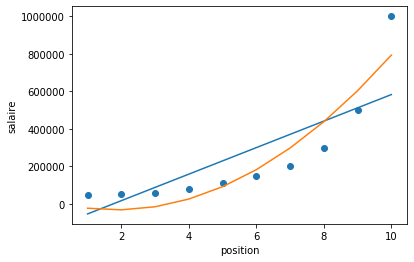

In [15]:
## REGRESSION POLYNOMIALE ##

y3 = sal.iloc[:,-1:].values
x = sal.iloc[:,1:2].values
x2 = x**2
x3 = x**3
X3 = np.hstack((x, x2, x3, np.ones(y3.shape)))
m = X3.shape[0]

print(X3.shape, y3.shape) # (10, 4) (10, 1) >> donc theta(4,1)

thetap3 = np.random.rand(4,1)


theta6 = descente_gradient(X3, y3, thetap3, 0.0001, 5000) 

print("coût theta6", fonction_cout(X3, y3, theta6)) # 


plt.scatter(sal["Level"], sal["Salary"])
plt.xlabel('position')
plt.ylabel('salaire')
plt.plot(x_simple, model(X_simple, theta1))
plt.plot(x,model(X, theta5))
plt.plot(x3,model(X3, theta6))
plt.show()